In [1]:
# origin author: how8570

import numpy as np
from keras.models import Sequential
from keras.layers import InputLayer, Dense
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
data = np.asarray(open('.\data.txt').read().split('\n'), dtype = np.float64)


In [3]:
timeSeriesLen = 50

In [4]:
data.shape

(1000,)

In [5]:
X = np.array([data[i:i+timeSeriesLen] for i in range(len(data)-timeSeriesLen)])
# data[0:50]
y = np.array(data[timeSeriesLen:])
# y = np.array([data[50+i:i+10+50] for i in range(len(data)-50)])

In [6]:
y.shape


(950,)

In [7]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
y = np.reshape(y, (y.shape[0], 1))

In [8]:
model = Sequential()
model.add(LSTM(units = 32, input_shape=(1,timeSeriesLen)))
model.add(Dense(units=1,
                activation='linear'))


In [9]:
model.compile(loss='mean_squared_error', optimizer=Adam(decay=0.001), metrics=['mae','mse', 'acc']) 

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                10624     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 10,657
Trainable params: 10,657
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X,y,
          batch_size=32,
          epochs=30,
          verbose=2,
          validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 760 samples, validate on 190 samples
Epoch 1/30
 - 2s - loss: 0.8833 - mean_absolute_error: 0.7901 - mean_squared_error: 0.8833 - acc: 0.0000e+00 - val_loss: 0.2508 - val_mean_absolute_error: 0.3878 - val_mean_squared_error: 0.2508 - val_acc: 0.0000e+00
Epoch 2/30
 - 0s - loss: 0.1727 - mean_absolute_error: 0.3262 - mean_squared_error: 0.1727 - acc: 0.0000e+00 - val_loss: 0.0986 - val_mean_absolute_error: 0.2526 - val_mean_squared_error: 0.0986 - val_acc: 0.0000e+00
Epoch 3/30
 - 0s - loss: 0.0800 - mean_absolute_error: 0.2238 - mean_squared_error: 0.0800 - acc: 0.0000e+00 - val_loss: 0.0416 - val_mean_absolute_error: 0.1749 - val_mean_squared_error: 0.0416 - val_acc: 0.0000e+00
Epoch 4/30
 - 0s - loss: 0.0553 - mean_absolute_error: 0.1807 - mean_squared_error: 0.0553 - acc: 0.0000e+00 - val_loss: 0.0343 - val_mean_absolute_error: 0.1497 - val_mean_squared_error: 0.0343 - val_acc: 0

In [12]:
xx = model.predict(X)

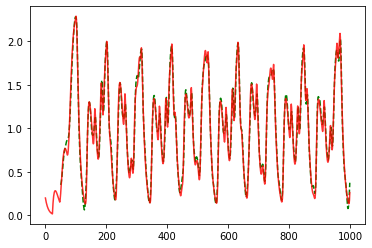

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(timeSeriesLen,1000), xx,'g--')
plt.plot(data,'r-', alpha = 0.8)
plt.show()

In [14]:
data.shape

(1000,)

In [15]:
X[-1]

array([[1.54522483, 1.60977594, 1.66467918, 1.7149404 , 1.76553983,
        1.82090044, 1.88262606, 1.94287082, 1.97544698, 1.9527389 ,
        1.88741105, 1.82369269, 1.80437335, 1.83718095, 1.89559796,
        1.95499398, 2.00763581, 2.05583165, 2.088748  , 2.05037339,
        1.92338771, 1.76254545, 1.60074648, 1.44854003, 1.30861907,
        1.18118057, 1.06559827, 0.96098076, 0.86637895, 0.78087504,
        0.703628  , 0.63389841, 0.57105385, 0.51455348, 0.46391964,
        0.41864615, 0.3780123 , 0.3412579 , 0.30792228, 0.27772882,
        0.25042744, 0.22576561, 0.20351925, 0.18355746, 0.16589498,
        0.15082472, 0.13934218, 0.13416091, 0.14195061, 0.17708293]])

In [16]:

for i in range(500):
    last_timeSeries = np.reshape(data[-timeSeriesLen:], (1,1, timeSeriesLen))
    predict_val = model.predict(last_timeSeries).reshape(1)
    data = np.concatenate([data,predict_val])
    

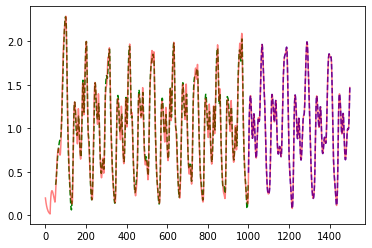

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(timeSeriesLen,1000), xx,'g--')
plt.plot(range(1000,1500), data[1000:],'b--')
plt.plot(data,'r-', alpha = 0.5)
plt.show()

In [18]:
data[1000:1500]

array([0.48942497, 0.66535157, 0.84711474, 1.00433874, 1.12197149,
       1.20612109, 1.2612896 , 1.30551505, 1.34582281, 1.36326087,
       1.37495577, 1.36644804, 1.33067667, 1.27755105, 1.20456612,
       1.11517763, 1.02937365, 0.96275401, 0.91173995, 0.89041382,
       0.88495851, 0.9015947 , 0.93488795, 0.98479855, 1.05578017,
       1.12071824, 1.16035712, 1.16587579, 1.14533758, 1.10109937,
       1.0455122 , 0.97915173, 0.91194111, 0.84442574, 0.7847631 ,
       0.73098856, 0.69115704, 0.67049688, 0.65853846, 0.66197681,
       0.69892287, 0.7475403 , 0.81047142, 0.87812048, 0.94190967,
       0.99763298, 1.04833317, 1.08999002, 1.1160171 , 1.12190652,
       1.11483359, 1.10004592, 1.08286607, 1.07875109, 1.09351885,
       1.12504137, 1.18114769, 1.26012719, 1.3547852 , 1.45496309,
       1.55165005, 1.64098155, 1.72035897, 1.7900368 , 1.85488784,
       1.90724576, 1.94478083, 1.96180964, 1.9557842 , 1.92643332,
       1.880705  , 1.82198751, 1.75485647, 1.68287337, 1.61468

In [19]:
fp = open('.\out.txt', 'w')

nums = data[1000:1500].tolist()
fp.writelines(', '.join(str(n) for n in nums))

fp.close()